# Lendo dados de geociência

## License

All content can be freely used and adapted under the terms of the 
[Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)

## Imports

Coloque **todos** os `import` na célula abaixo. Não se esqueça do `%matplotlib inline` para que os gráficos apareçam no notebook.

In [14]:
# Importamos as bibliotecas de cálculo númérico e gráficos
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## IMPORTANTE

Agora que vocês sabem técnicas de programação defensiva, eu espero que todo o código que vocês fizerem abaixo utilizem essas técnicas. Crie docstrings para suas funções, cheque as entradas (quando for possível) e cheque as saídas. **Não esqueçam dos comentários**.

## Temperatura no Rio de Janeiro

O arquivo `data/23.31S-42.82W-TAVG-Trend.txt` contém dados de temperatura média mensal para a cidade do Rio de Janeiro. O arquivo também contém médias móveis anual, 5, 10 e 20 anos. Esses dados foram baixados do site Berkeley Earth (http://berkeleyearth.lbl.gov/locations/23.31S-42.82W).

### Tarefa

Faça duas funções, uma que lê os dados de temperatura mensal, outra que lê os dados da média móvel anual.
As duas funções devem:

* Receber como entrada **somente** o nome do arquivo de dados.
* Retornar duas listas: uma com as datas referentes aos dados e outra com os dados de temperatura.
* As datas retornadas devem ser em anos decimais. Ex: Janeiro de 1984 seria 1984.0833333333333 (1984 + 1/12).
* Datas sem valores de temperatura (NaN) devem ser ignoradas (não incluidas nas listas).

Utilize suas funções para carregar os dados e fazer um gráfico da temperatura média mensal e média movel anual pelo tempo.

In [15]:
def temperatura_mensal_data(nomedoarquivo): # Definimos a função temperatura_mensal_data com o nome do arquivo de dados como entrada
    """
    Transforma as datas em anos decimais e soma a temperatura média às anomalias mensais de temperatura, tendo como resultado duas listas: uma com a data em anos decimais e uma com as temperaturas médias mensais.
    """
    arquivo = open(nomedoarquivo) # Código para abrir o arquivo
    data_mensal = [] # Criamos uma lista vazia data, que receberá no final da função as datas em anos decimais
    temp_mensal = [] # Criamos uma lista vazia temp_mensal, que receberá no final da função as médias mensais de temperatura
    for linha in arquivo: # Percorremos cada linha do arquivo
        lista = linha.split() # Criamos uma lista separando os elementos de cada linha separados por espaços
        if linha[0] != "%": # Criamos a condição de que o 1º elemento de cada linha tem que ser diferente de "%", pois não são dados
            if len(lista) != 0: # Criamos a condição de que o número de elementos da lista tem que ser diferente de zero, pois isso corresponde a uma linha vazia
                if lista[2] != "NaN": # Criamos a condição de que o 3º elemento de cada linha tem que ser diferente de "NaN", pois NaN aparece no arquivo quando não há um dado de temperatura
                    ano = float(lista[0]) # Definimos a variável ano como sendo o 1º elemento de cada linha, que é a posição dos anos no arquivo
                    mes = float(lista[1]) # Definimos a variável mes como sendo o 2º elemento de cada linha, que é a posição dos meses no arquivo
                    anos_decimais = ano + mes/12 # Calculamos as datas em anos decimais
                    data_mensal.append(anos_decimais) # Adicionamos os valores em anos decimais na lista vazia data
                    anomalia_mensal = float(lista[2]) # Definimos a variável anomalia_mensal como sendo o 3º elemento de cada linha, que é a posição das anomalias mensais de temperatura no arquivo
                    media_mensal = 24.01 + anomalia_mensal # Calculamos a temperatura média mensal para cada data, somando a média geral às anomalias mensais
                    temp_mensal.append(media_mensal) # Adicionamos os valores de temperatura média mensal na lista vazia temp_mensal
    return data_mensal, temp_mensal # Retornamos como resultado da função as listas data e temp_mensal

In [16]:
temperatura_mensal_data("data/23.31S-42.82W-TAVG-Trend.txt") # Testamos a função

([1832.0833333333333,
  1832.1666666666667,
  1832.25,
  1832.3333333333333,
  1832.4166666666667,
  1832.5,
  1832.5833333333333,
  1832.6666666666667,
  1832.75,
  1832.8333333333333,
  1832.9166666666667,
  1833.0,
  1833.0833333333333,
  1833.1666666666667,
  1833.25,
  1833.3333333333333,
  1833.4166666666667,
  1833.5,
  1833.5833333333333,
  1833.6666666666667,
  1833.75,
  1833.8333333333333,
  1833.9166666666667,
  1834.0,
  1834.0833333333333,
  1834.1666666666667,
  1834.25,
  1834.3333333333333,
  1834.4166666666667,
  1834.5,
  1834.5833333333333,
  1834.6666666666667,
  1834.75,
  1834.8333333333333,
  1834.9166666666667,
  1835.0,
  1835.0833333333333,
  1835.1666666666667,
  1835.25,
  1835.3333333333333,
  1835.4166666666667,
  1835.5,
  1835.5833333333333,
  1835.6666666666667,
  1835.75,
  1835.8333333333333,
  1835.9166666666667,
  1836.0,
  1836.0833333333333,
  1836.1666666666667,
  1836.25,
  1836.3333333333333,
  1836.4166666666667,
  1836.5,
  1836.583333333333

In [17]:
def temperatura_anual_data(nomedoarquivo): # Definimos a função temperatura_anual_data com o nome do arquivo de dados como entrada
    """
    Transforma as datas em anos decimais e soma a temperatura média às anomalias anuais de temperatura, tendo como resultado duas listas: uma com a data em anos decimais e uma com as temperaturas médias anuais.
    """
    arquivo = open(nomedoarquivo) # Código para abrir o arquivo
    data_anual = [] # Criamos uma lista vazia data, que receberá no final da função as datas em anos decimais
    temp_anual = [] # Criamos uma lista vazia temp_anual, que receberá no final da função as médias anuais de temperatura
    for linha in arquivo: # Percorremos cada linha do arquivo
        lista = linha.split() # Criamos uma lista separando os elementos de cada linha separados por espaços
        if linha[0] != "%": # Criamos a condição de que o 1º elemento de cada linha tem que ser diferente de "%", pois não são dados
            if len(lista) != 0:  # Criamos a condição de que o número de elementos da lista tem que ser diferente de zero, pois isso corresponde a uma linha vazia
                if lista[4] != "NaN": # Criamos a condição de que o 3º elemento de cada linha tem que ser diferente de "NaN", pois NaN aparece no arquivo quando não há um dado de temperatura
                    ano = float(lista[0]) # Definimos a variável ano como sendo o 1º elemento de cada linha, que é a posição dos anos no arquivo
                    mes = float(lista[1]) # Definimos a variável mes como sendo o 2º elemento de cada linha, que é a posição dos meses no arquivo
                    anos_decimais = ano + mes/12 # Calculamos as datas em anos decimais
                    data_anual.append(anos_decimais) # Adicionamos os valores em anos decimais na lista vazia data
                    anomalia_anual = float(lista[4])  # Definimos a variável anomalia_mensal como sendo o 5º elemento de cada linha, que é a posição das anomalias anuais de temperatura no arquivo
                    media_anual = 24.01 + anomalia_anual # Calculamos a temperatura média anual para cada data, somando a média geral às anomalias anuais
                    temp_anual.append(media_anual) # Adicionamos os valores de temperatura média anual na lista vazia temp_anual
    return data_anual, temp_anual  # Retornamos como resultado da função as listas data e temp_anual

In [18]:
temperatura_anual_data("data/23.31S-42.82W-TAVG-Trend.txt") # Testamos a função

([1832.25,
  1832.3333333333333,
  1832.4166666666667,
  1832.5,
  1832.5833333333333,
  1832.6666666666667,
  1832.75,
  1832.8333333333333,
  1832.9166666666667,
  1833.0,
  1833.0833333333333,
  1833.1666666666667,
  1833.25,
  1833.3333333333333,
  1833.4166666666667,
  1833.5,
  1833.5833333333333,
  1833.6666666666667,
  1833.75,
  1833.8333333333333,
  1833.9166666666667,
  1834.0,
  1834.0833333333333,
  1834.1666666666667,
  1834.25,
  1834.3333333333333,
  1834.4166666666667,
  1834.5,
  1834.5833333333333,
  1834.6666666666667,
  1834.75,
  1834.8333333333333,
  1834.9166666666667,
  1835.0,
  1835.0833333333333,
  1835.1666666666667,
  1835.25,
  1835.3333333333333,
  1835.4166666666667,
  1835.5,
  1835.5833333333333,
  1835.6666666666667,
  1835.75,
  1835.8333333333333,
  1835.9166666666667,
  1836.0,
  1836.0833333333333,
  1836.1666666666667,
  1836.25,
  1836.3333333333333,
  1836.4166666666667,
  1836.5,
  1836.5833333333333,
  1836.6666666666667,
  1836.75,
  1836.8

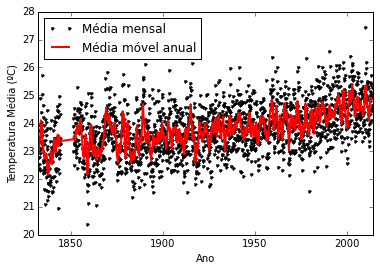

In [38]:
 # Carregamos os dados que vamos utilizar no gráfico utilizando as funções
[data_mensal, temp_mensal] = temperatura_mensal_data("data/23.31S-42.82W-TAVG-Trend.txt")
[data_anual, temp_anual] = temperatura_anual_data("data/23.31S-42.82W-TAVG-Trend.txt")
plt.figure() # Criamos uma figura
plt.plot(data_mensal, temp_mensal, ".k", label = "Média mensal") # Definimos os valores dos eixos, o marcador como bolinha preta e a legenda
plt.plot(data_anual, temp_anual, "-r", label = "Média móvel anual", linewidth = 2) # Definimos os valores dos eixos, o marcador como linha vermelha e a legenda
plt.xlabel("Ano") # Nomeamos o eixo x
plt.xlim(1832, 2014) # Definimos o intervalo de x
plt.ylabel("Temperatura Média (ºC)") # Nomeamos o eixo y
legend = plt.legend(loc = 'upper left', fontsize = 'large') # Definimos a  posição e o tamanho da fonte da legenda

### Resultado esperado

O gráfico final deve ser parecido com o abaixo:

![images/media-mensal-temp-rio.png](images/media-mensal-temp-rio.png)

### Tarefa

Faça uma função que calcule a temperatura média anual a partir das temperaturas mensais. A sua função deve:

* Receber como entrada a lista das datas e a lista das temperaturas mensais.
* Retornar duas listas: uma com os anos e outra com as temperaturas médias correspondetes.
* Anos que não contem dados de todos os 12 meses devem ser ignorados (não incluídos nas listas retornadas).

Utilize sua função para calcular a média anual. Faça um gráfico da temperatura média anual por ano junto com a média móvel anual.

**Dica**: A função `math.floor` retorna o número inteiro que precede um número real. Ex: `math.floor(1984.23) == 1984`

### Resultado esperado

O gráfico final deve ser parecido com o abaixo:

![images/media-anual-temp-rio.png](images/media-anual-temp-rio.png)

## Tarefa Bônus

Salve os dados da média anual em um arquivo CSV (comma separated values) chamado `temp-media-anual.csv`. Os valores devem ser separados por `,`. A primeira coluna deve conter os anos e a segunda as temperaturas. Esse arquivo deve estar presente em seu repositório (dê `git add` nele).